In [ ]:
!pip install mdptoolbox-hiive
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install gym
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.3 MB/s 
  Created wheel for mdptoolbox-hiive: filename=mdptoolbox_hiive-4.0.3.1-py3-none-any.whl size=35122 sha256=454950899b83cb4b177bb73b66f8304789004256ad7e3e71b753fc6b448c0cfe
  Stored in directory: /root/.cache/pip/wheels/7e/57/29/d73571a87eb4167889f15457e0ed88c71292f0da5590681248
Successfully built mdptoolbox-hiive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=9dc3c40a6167a7a499413bb3f41c26aec9dd8ff440

In [ ]:
import hiive.mdptoolbox as mdptoolbox
import hiive.mdptoolbox.example
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from IPython.display import clear_output, display

# suppress pandas warning
pd.options.mode.chained_assignment = None

# set seed
np.random.seed(0)

%matplotlib inline

In [ ]:
import math
def evaluate_policy(P, R, policy, test_count=100, gamma=0.9):
    num_state = P.shape[-1]
    total_episode = num_state * test_count
    # start in each state
    total_reward = 0
    for state in range(num_state):
        state_reward = 0
        for state_episode in range(test_count):
            episode_reward = 0
            disc_rate = 1
            while True:
                # take step
                action = policy[state]
                # get next step using P
                probs = P[action][state]
                candidates = list(range(len(P[action][state])))
                next_state =  np.random.choice(candidates, 1, p=probs)[0]
                # get the reward
                reward = R[state][action] * disc_rate
                episode_reward += reward
                # when go back to 0 ended
                disc_rate *= gamma
                if next_state == 0:
                    break
            state_reward += episode_reward
        total_reward += state_reward
    return total_reward / total_episode

def run_Forest(states, test_count):

    print('VALUE ITERATION WITH FOREST MANAGEMENT ' + str(states) + ' STATES ')
    P, R = mdptoolbox.example.forest(S=states)
    value_f = [0]*10
    policy = [0]*10
    iters = [0]*10
    time_array = [0]*10
    gamma_arr = [0] * 10
    epsilon_arr = [0] * 10

    for i in range(0,10):
        pi = mdptoolbox.mdp.ValueIteration(P, R, (i+0.5)/10)
        pi.run()
        gamma_arr[i]=(i+0.5)/10
        epsilon_arr[i]=math.pow(10,-5-i)
        value_f[i] = np.mean(pi.V)
        policy[i] = pi.policy
        iters[i] = pi.iter
        time_array[i] = pi.time

    # print('Forest Management ' + str(states) + ' states - Value Iteration Policy')
    # print(policy)
    
    plt.plot(gamma_arr, time_array)
    plt.xlabel('Gammas')
    plt.title('Forest Management ' + str(states) + ' states  - Value Iteration')
    plt.ylabel('Execution Time (s)')
    plt.grid()
    plt.show()
    
    plt.plot(gamma_arr,value_f)
    plt.xlabel('Gammas')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management ' + str(states) + ' states  - Value Iteration')
    plt.grid()
    plt.show()

    plt.plot(gamma_arr,iters)
    plt.xlabel('Gammas')
    plt.ylabel('Iterations to Converge')
    plt.title('Forest Management ' + str(states) + ' states  - Value Iteration')
    plt.grid()
    plt.show()

    plt.plot(iters,value_f)
    plt.xlabel('Iterations to Converge')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management ' + str(states) + ' states  - Value Iteration')
    plt.grid()
    plt.show()

    plt.plot(epsilon_arr,value_f)
    plt.xlabel('Epsilon')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management ' + str(states) + ' states  - Value Iteration')
    plt.grid()
    plt.show()


    print('POLICY ITERATION WITH FOREST MANAGEMENT ' + str(states) + ' STATES')
    P, R = mdptoolbox.example.forest(S=states)
    value_f = [0]*10
    policy = [0]*10
    iters = [0]*10
    time_array = [0]*10
    gamma_arr = [0] * 10
    for i in range(0,10):
        pi = mdptoolbox.mdp.PolicyIteration(P, R, (i+0.5)/10)
        pi.run()
        gamma_arr[i]=(i+0.5)/10
        value_f[i] = np.mean(pi.V)
        policy[i] = pi.policy
        iters[i] = pi.iter
        time_array[i] = pi.time

    # print('Forest Management ' + str(states) + ' states - Policy Iteration Policy')
    # print(policy)

    plt.plot(gamma_arr, time_array)
    plt.xlabel('Gammas')
    plt.title('Forest Management ' + str(states) + ' states - Policy Iteration')
    plt.ylabel('Execution Time (s)')
    plt.grid()
    plt.show()

    
    plt.plot(gamma_arr,value_f)
    plt.xlabel('Gammas')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management ' + str(states) + ' states  - Policy Iteration')
    plt.grid()
    plt.show()

    plt.plot(gamma_arr,iters)
    plt.xlabel('Gammas')
    plt.ylabel('Iterations to Converge')
    plt.title('Forest Management ' + str(states) + ' states  - Policy Iteration')
    plt.grid()
    plt.show()

    plt.plot(iters,value_f)
    plt.xlabel('Iterations to Converge')
    plt.ylabel('Average Rewards')
    plt.title('Forest Management ' + str(states) + ' states  - Policy Iteration')
    plt.grid()
    plt.show()

STARTING FOREST MANAGEMENT 25 STATES
VALUE ITERATION WITH FOREST MANAGEMENT 25 STATES 


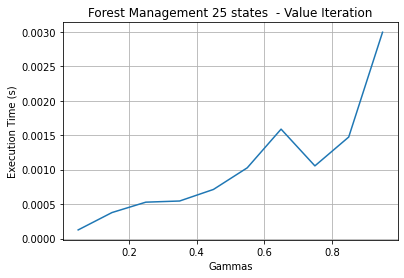

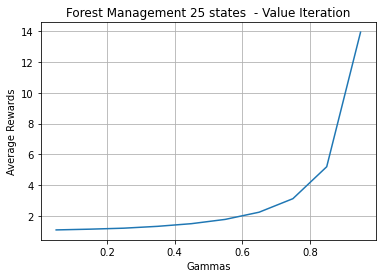

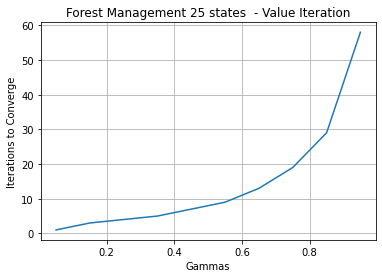

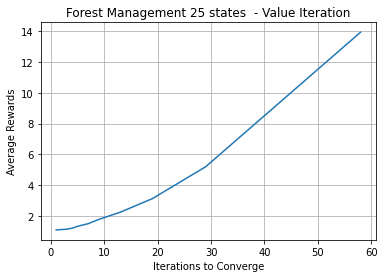

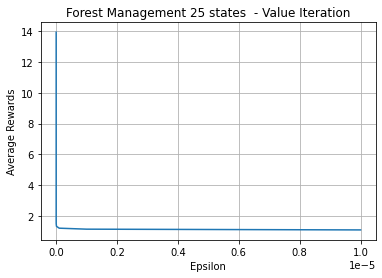

POLICY ITERATION WITH FOREST MANAGEMENT 25 STATES


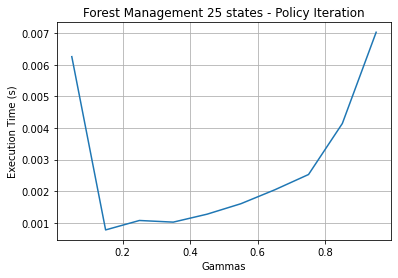

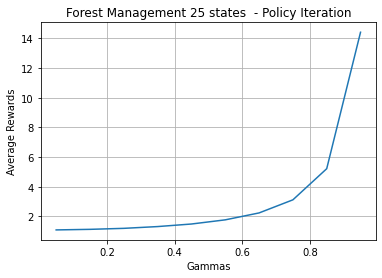

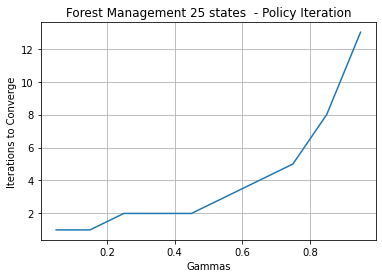

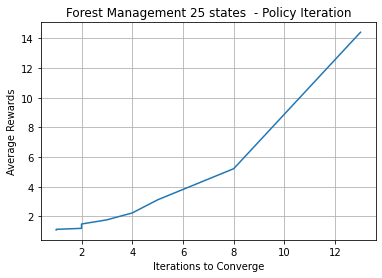

In [ ]:
print('STARTING FOREST MANAGEMENT 25 STATES')
run_Forest(25, 1000) # States, test_count

In [ ]:
# code based on:
# https://medium.com/analytics-vidhya/solving-the-frozenlake-environment-from-openai-gym-using-value-iteration-5a078dffe438
def get_score(env, policy, printInfo=False, episodes=1000):
    misses = 0
    steps_list = []
    for episode in range(episodes):
        observation = env.reset()
        steps=0
        while True:
            action = policy[observation]
            observation, reward, done, _,_ = env.step(action)
            steps+=1
            if done and reward == 1:
                # print('You have got the Frisbee after {} steps'.format(steps))
                steps_list.append(steps)
                break
            elif done and reward == 0:
                # print("You fell in a hole!")
                misses += 1
                break
    ave_steps = np.mean(steps_list)
    std_steps = np.std(steps_list)
    pct_fail  = (misses/episodes)* 100
    
    if (printInfo):
        print('----------------------------------------------')
        print('You took an average of {:.0f} steps to get the frisbee'.format(ave_steps))
        print('And you fell in the hole {:.2f} % of the times'.format(pct_fail))
        print('----------------------------------------------')
  
    return ave_steps, std_steps, pct_fail


In [ ]:
colors = {
    0: 'g',
    1: 'k'
}

labels = {
    0: 'W',
    1: 'C',
}

def plot_forest(policy, title='Forest Management'):
    rows = 5
    cols = 5
    
    # reshape policy array to be 2-D - assumes 500 states...
    policy = np.array(list(policy)).reshape(rows,cols)
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, xlim=(-.01, cols+0.01), ylim = (-.01, rows+0.01))
    plt.title(title, fontsize=16, weight='bold', y=1.01)
    
    for i in range(5):
        for j in range(5):
            y = 5 - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1, linewidth=1, edgecolor='k')
            p.set_facecolor(colors[policy[i,j]])
            ax.add_patch(p)
            
            text = ax.text(x+0.5, y+0.5, labels[policy[i, j]],
                           horizontalalignment='center', size=10, verticalalignment='center', color='w')
    
    plt.axis('off')
    
    
#plot_forest(bestPolicy)

In [ ]:
def valueIteration(t, r, gammas, epsilons, showResults=False, max_iterations=100000):
    t0 = time.time()
    
    # create data structure to save off
    columns = ['gamma', 'epsilon', 'time', 'iterations', 'reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    data = pd.DataFrame(0.0, index=np.arange(len(gammas)*len(epsilons)), columns=columns)
    
    print('Gamma,\tEps,\tTime,\tIter,\tReward')
    print(80*'_')
    
    testNum = 0
    for g in gammas:
        for e in epsilons:
            test = ValueIteration(t, r, gamma=g, epsilon=e, max_iter=max_iterations)
            
            runs  = test.run()
            Time  = runs[-1]['Time']
            iters = runs[-1]['Iteration']
            maxR  = runs[-1]['Max V']
            
            max_rewards, mean_rewards, errors = [], [], []
            for run in runs:
                max_rewards.append(run['Max V'])
                mean_rewards.append(run['Mean V'])
                errors.append(run['Error'])
            
            policy = np.array(test.policy)
            
            data['gamma'][testNum]        = g
            data['epsilon'][testNum]      = e
            data['time'][testNum]         = Time
            data['iterations'][testNum]   = iters
            data['reward'][testNum]       = maxR
            data['mean_rewards'][testNum] = {tuple(mean_rewards)}
            data['max_rewards'][testNum]  = {tuple(max_rewards)}
            data['error'][testNum]        = {tuple(errors)}
            data['policy'][testNum]       = {test.policy}
            
            print('%.2f,\t%.0E,\t%.2f,\t%d,\t%f' % (g, e, Time, iters, maxR))
            
            testNum = testNum + 1
        
    endTime = time.time() - t0
    print('Time taken: %.2f' % endTime)
    
    # See differences in policy
    policies = data['policy']
    
    # replace all NaN's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [ ]:
T,R = hiive.mdptoolbox.example.forest(S=25)
gammas   = [0.1, 0.3, 0.6, 0.9]
epsilons = [1e-2, 1e-3, 1e-8, 1e-12]
vi_data  = valueIteration(T, R, gammas, epsilons, showResults=False)

#vi_data.head()

Gamma,	Eps,	Time,	Iter,	Reward
________________________________________________________________________________
0.10,	1E-02,	0.00,	2,	4.360000
0.10,	1E-03,	0.00,	3,	4.393300
0.10,	1E-08,	0.00,	8,	4.396613
0.10,	1E-12,	0.00,	12,	4.396613
0.30,	1E-02,	0.00,	4,	5.460862
0.30,	1E-03,	0.00,	6,	5.489575
0.30,	1E-08,	0.00,	15,	5.491933
0.30,	1E-12,	0.00,	22,	5.491933
0.60,	1E-02,	0.00,	11,	8.797055
0.60,	1E-03,	0.00,	15,	8.808703
0.60,	1E-08,	0.00,	33,	8.809994
0.60,	1E-12,	0.00,	48,	8.809994
0.90,	1E-02,	0.00,	39,	23.089675
0.90,	1E-03,	0.00,	50,	23.147532
0.90,	1E-08,	0.01,	105,	23.172360
0.90,	1E-12,	0.01,	149,	23.172433
Time taken: 0.08


In [ ]:
policies = vi_data['policy']

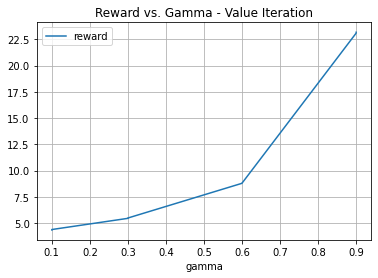

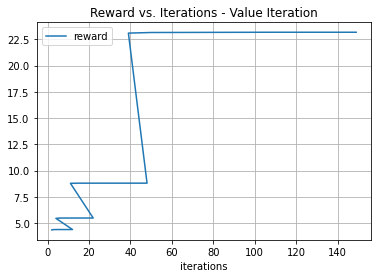

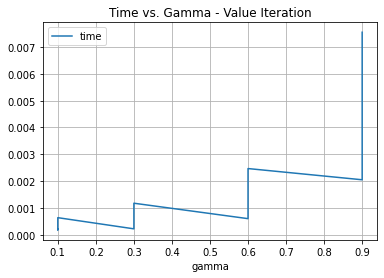

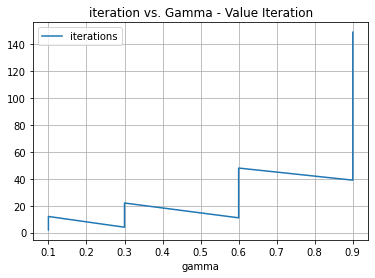

In [ ]:
vi_data.plot(x='gamma', y='reward', title="Reward vs. Gamma - Value Iteration")
plt.grid()

vi_data.plot(x='iterations', y='reward', title="Reward vs. Iterations - Value Iteration")
plt.grid(True)

vi_data.plot(x='gamma', y='time', title="Time vs. Gamma - Value Iteration")
plt.grid(True)

vi_data.plot(x='gamma', y='iterations', title="iteration vs. Gamma - Value Iteration")
plt.grid(True)

Best Result:
	Reward = 23.17
	Gamma = 0.9000000
	Epsilon= 1E-12


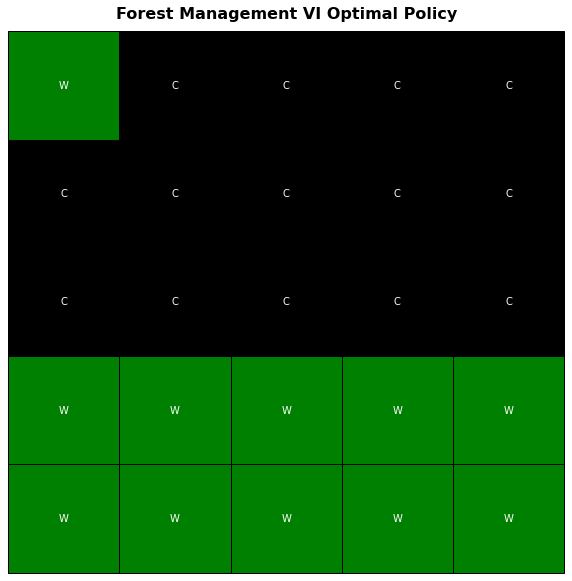

In [ ]:
# find the highest score
bestRun = vi_data['reward'].argmax()
bestPolicy = vi_data['policy'][bestRun]

title='Forest Management VI Optimal Policy'
plot_forest(bestPolicy, title)

# Save off data to a csv file
vi_data.to_csv('VI_results.csv')

print('Best Result:\n\tReward = %.2f\n\tGamma = %.7f\n\tEpsilon= %.E' % (vi_data['reward'].max(), vi_data['gamma'][bestRun], vi_data['epsilon'][bestRun]))


In [ ]:
def policyIteration(t, r, gammas, showResults=False, max_iterations=100000):
    t0 = time.time()
    
    # create data structure to save off
    columns = ['gamma', 'epsilon', 'time', 'iterations', 'reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    data = pd.DataFrame(0.0, index=np.arange(len(gammas)), columns=columns)
    
    print('gamma,\ttime,\titer,\treward')
    print(80*'_')
    
    testnum = 0
    for g in gammas:
        test = PolicyIteration(t, r, gamma=g, max_iter=max_iterations, eval_type="matrix") # eval_type="iterative"
        
        runs  = test.run()
        Time  = test.time
        iters = test.iter
        maxr  = runs[-1]['Max V']
                
        max_rewards, mean_rewards, errors = [], [], []
        for run in runs:
            max_rewards.append(run['Max V'])
            mean_rewards.append(run['Mean V'])
            errors.append(run['Error'])
        
        data['gamma'][testnum]        = g
        data['time'][testnum]         = Time
        data['iterations'][testnum]   = iters
        data['reward'][testnum]       = maxr
        data['mean_rewards'][testnum] = {tuple(mean_rewards)}
        data['max_rewards'][testnum]  = {tuple(max_rewards)}
        data['error'][testnum]        = {tuple(errors)}
        data['policy'][testnum]       = {test.policy}
        
        print('%.2f,\t%.2f,\t%d,\t%f' % (g, Time, iters, maxr))
        
        if showResults:
            plot_forest(policy, title)
            pass
        
        testnum = testnum + 1
        
    endTime = time.time() - t0
    print('Time taken: %.2f' % endTime)
    
    # see differences in policy
    policies = data['policy']
        
    # replace all nan's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [ ]:
gammas   = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pi_data  = policyIteration(T, R, gammas, showResults=False)

#pi_data.head()

gamma,	time,	iter,	reward
________________________________________________________________________________
0.10,	0.01,	1,	4.396613
0.20,	0.00,	1,	4.882699
0.30,	0.00,	2,	5.491933
0.40,	0.00,	2,	6.277574
0.50,	0.00,	3,	7.329154
0.60,	0.00,	3,	8.809994
0.70,	0.01,	5,	11.054551
0.80,	0.01,	6,	14.883721
0.90,	0.02,	10,	23.172434
Time taken: 0.14


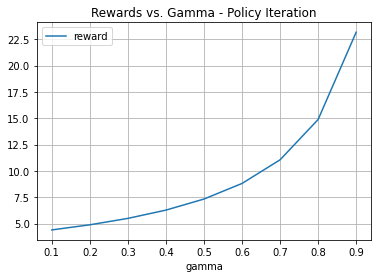

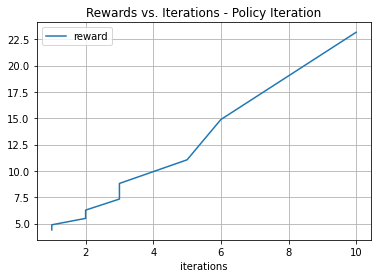

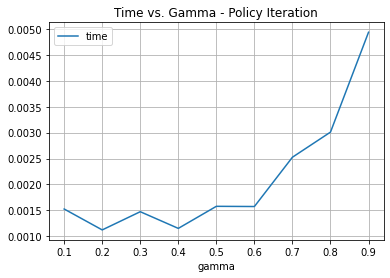

In [ ]:
pi_data.plot(x='gamma', y='reward', title='Rewards vs. Gamma - Policy Iteration')
plt.grid()

pi_data.plot(x='iterations', y='reward', title='Rewards vs. Iterations - Policy Iteration')
plt.grid()

pi_data.plot(x='gamma', y='time', title='Time vs. Gamma - Policy Iteration')
plt.grid()

Best Result:
	Reward = 23.17
	Gamma = 0.900


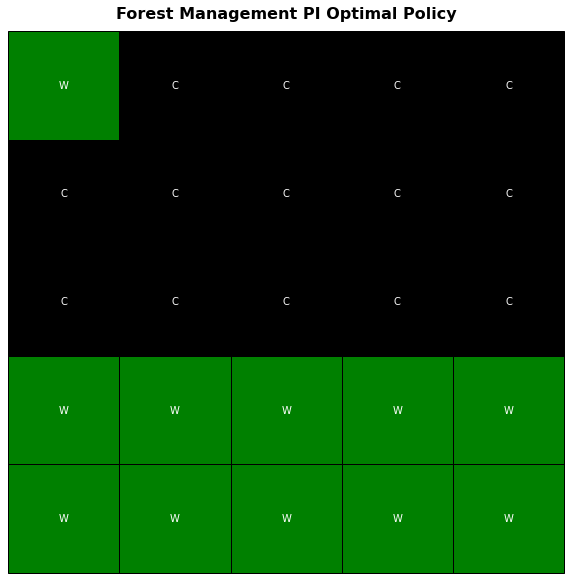

In [ ]:
# find the highest score
bestRun = pi_data['reward'].argmax()
bestPolicy = pi_data['policy'][bestRun]

title='Forest Management PI Optimal Policy'
plot_forest(bestPolicy, title)

# Save off data to a csv file
pi_data.to_csv('PI_results.csv')

print('Best Result:\n\tReward = %.2f\n\tGamma = %.3f' % (pi_data['reward'].max(), pi_data['gamma'][bestRun]))


In [ ]:
def qLearning(t, r, gammas, alphas, alpha_decays=[0.99], epsilon_decays=[0.99], n_iterations=[10000000], showResults=False):
    # create data structure to save off
    columns = ['gamma', 'alpha', 'alpha_decay', 'epsilon_decay', 'iterations', 'time', 'reward', 'average_steps', 'steps_stddev', 'success_pct', 'policy', 'mean_rewards', 'max_rewards', 'error']
    numTests = len(gammas)*len(alphas)*len(alpha_decays)*len(epsilon_decays)*len(n_iterations)
    data = pd.DataFrame(0.0, index=np.arange(numTests), columns=columns)
    
    print('Gamma,\tAlpha,\tTime,\tIter,\tReward')
    print(80*'_')
    
    testNum = 0
    for g in gammas:
        for a in alphas:
            for a_decay in alpha_decays:
                for e_decay in epsilon_decays:
                    for n in n_iterations:
                        print('Test Num %d/%d' %(testNum+1, numTests))
                        print('Gamma: %.2f,\tAlpha: %.2f,\tAlpha Decay:%.3f,\tEpsilon Decay:%.3f,\tIterations:%d' 
                             %(g, a, a_decay, e_decay, n))
                        
                        test = QLearning(t, r, gamma=g, alpha=a, alpha_decay=a_decay, epsilon_decay=e_decay, n_iter=n)
                        
                        runs  = test.run()
                        time  = runs[-1]['Time']
                        iters = runs[-1]['Iteration']
                        maxR  = runs[-1]['Max V']
                        
                        max_rewards, mean_rewards, errors = [], [], []
                        for run in runs:
                            max_rewards.append(run['Max V'])
                            mean_rewards.append(run['Mean V'])
                            errors.append(run['Error'])
                        
                        #policy = np.array(test.policy)
                        #policy = policy.reshape(4,4)
                        
                        data['gamma'][testNum]         = g
                        data['alpha'][testNum]         = a
                        data['alpha_decay'][testNum]   = a_decay
                        data['epsilon_decay'][testNum] = e_decay
                        data['time'][testNum]          = time
                        data['iterations'][testNum]    = iters
                        data['reward'][testNum]        = maxR
                        data['mean_rewards'][testNum]  = {tuple(mean_rewards)}
                        data['max_rewards'][testNum]   = {tuple(max_rewards)}
                        data['error'][testNum]         = {tuple(errors)}
                        data['policy'][testNum]        = {test.policy}
                        
                        print('%.2f,\t%.2f,\t%.2f,\t%d,\t%f' % (g, a, time, iters, maxR))
                        
                        if showResults:
                            pass
                        
                        testNum = testNum + 1
            
    # See differences in policy
    policies = data['policy']
    
    '''
    for i,p in enumerate(policies):
        pol = list(p)[0]
        steps, steps_stddev, failures = get_score(env, pol, showResults)
        data['average_steps'][i] = steps
        data['steps_stddev'][i]  = steps_stddev
        data['success_pct'][i]   = 100-failures      
    '''
        
    # replace all NaN's
    data.fillna(0, inplace=True)
    data.head()
        
    return data

In [ ]:
gammas         = [0.8, 0.9, 0.99]
alphas         = [0.01, 0.1, 0.2]
alpha_decays   = [0.9, 0.999]
epsilon_decays = [0.9, 0.999]
iterations     = [1e5, 1e6, 1e7]

''' PROCEED WITH CAUTION >>>> THIS WILL OVERWRITE DATA AND TAKE HOURS
'''
ql_data  = qLearning(T, R, gammas, alphas, alpha_decays=alpha_decays, epsilon_decays=epsilon_decays, n_iterations=iterations, showResults=False)

# write all results to csv file
csvFile = 'QL_results.csv'
ql_data.to_csv(csvFile)

ql_data.head()


Gamma,	Alpha,	Time,	Iter,	Reward
________________________________________________________________________________
Test Num 1/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:100000
0.80,	0.01,	6.46,	100000,	2.669558
Test Num 2/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:1000000
0.80,	0.01,	54.51,	1000000,	7.720276
Test Num 3/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.900,	Iterations:10000000
0.80,	0.01,	443.95,	10000000,	15.109917
Test Num 4/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:100000
0.80,	0.01,	4.43,	100000,	2.677498
Test Num 5/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:1000000
0.80,	0.01,	44.73,	1000000,	8.590538
Test Num 6/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.900,	Epsilon Decay:0.999,	Iterations:10000000
0.80,	0.01,	439.79,	10000000,	3.613983
Test Num 7/108
Gamma: 0.80,	Alpha: 0.01,	Alpha Decay:0.999,	Eps

,gamma,alpha,alpha_decay,epsilon_decay,iterations,time,reward,average_steps,steps_stddev,success_pct,policy,mean_rewards,max_rewards,error
0,0.8,0.01,0.9,0.900,100000.0,6.460429,2.669558,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,...","{(0.000751062520966867, 0.0010060965245713837,...","{(0.009756228097545044, 0.01606508902844391, 0...","{(0.0038513280975450413, 9.366625187075038e-08..."
1,0.8,0.01,0.9,0.900,1000000.0,54.513045,7.720276,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,...","{(0.0016766290357338614, 0.0032243258304222614...","{(0.030542714631542473, 0.06674011250425047, 0...","{(0.0, 0.0, 4.602174959778758e-11, 0.004, 0.0,..."
2,0.8,0.01,0.9,0.900,10000000.0,443.950635,15.109917,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,...","{(0.01901121092540099, 0.03501470285472964, 0....","{(0.3549143954423267, 0.6095983150040196, 0.81...","{(0.001043728279105805, 0.0, 0.001254527171622..."
3,0.8,0.01,0.9,0.999,100000.0,4.428059,2.677498,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,...","{(0.0010372728077489863, 0.0010977900436381501...","{(0.014266742989413016, 0.014266742989413016, ...","{(3.5583950414525856e-05, 1.3942115683307524e-..."
4,0.8,0.01,0.9,0.999,1000000.0,44.725710,8.590538,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{(0.0018710087217044624, 0.002913660111255626,...","{(0.01592355712828746, 0.02767210488490978, 0....","{(0.0010001737456360369, 0.0010005190215653839..."


In [ ]:
# Read in Q-Learning data
ql_data = pd.read_csv('QL_results.csv')
ql_data.head()

,Unnamed: 0,gamma,alpha,alpha_decay,epsilon_decay,iterations,time,reward,average_steps,steps_stddev,success_pct,policy,mean_rewards,max_rewards,error
0,0,0.8,0.01,0.9,0.900,100000.0,6.460429,2.669558,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,...","{(0.000751062520966867, 0.0010060965245713837,...","{(0.009756228097545044, 0.01606508902844391, 0...","{(0.0038513280975450413, 9.366625187075038e-08..."
1,1,0.8,0.01,0.9,0.900,1000000.0,54.513045,7.720276,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,...","{(0.0016766290357338614, 0.0032243258304222614...","{(0.030542714631542473, 0.06674011250425047, 0...","{(0.0, 0.0, 4.602174959778758e-11, 0.004, 0.0,..."
2,2,0.8,0.01,0.9,0.900,10000000.0,443.950635,15.109917,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,...","{(0.01901121092540099, 0.03501470285472964, 0....","{(0.3549143954423267, 0.6095983150040196, 0.81...","{(0.001043728279105805, 0.0, 0.001254527171622..."
3,3,0.8,0.01,0.9,0.999,100000.0,4.428059,2.677498,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,...","{(0.0010372728077489863, 0.0010977900436381501...","{(0.014266742989413016, 0.014266742989413016, ...","{(3.5583950414525856e-05, 1.3942115683307524e-..."
4,4,0.8,0.01,0.9,0.999,1000000.0,44.725710,8.590538,0.0,0.0,0.0,"{(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","{(0.0018710087217044624, 0.002913660111255626,...","{(0.01592355712828746, 0.02767210488490978, 0....","{(0.0010001737456360369, 0.0010005190215653839..."


In [ ]:
# Look at correlation matrix
interest = ['gamma', 'alpha', 'alpha_decay', 'epsilon_decay', 'iterations', 'reward', 'time']

# pick out hyperparameters and how succesful they were
df = ql_data[interest]

# See what affected the success_pct the most
ql_corr = df.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


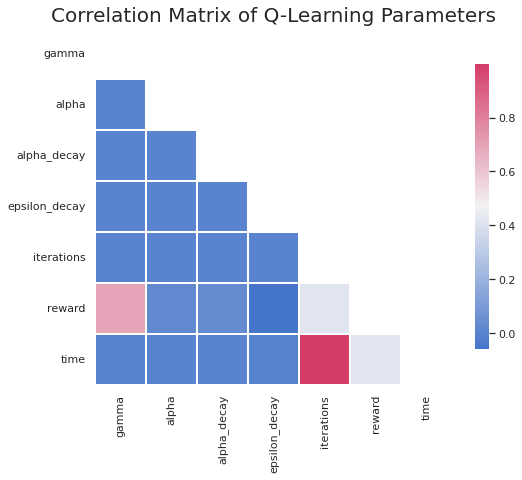

In [ ]:
# Create heatmap of correlation matrix
sns.set(style="white")
fig, ax = plt.subplots(figsize=(8,7))
ax.set_title('Correlation Matrix of Q-Learning Parameters', fontsize=20)
mask = np.triu(np.ones_like(ql_corr, dtype=np.bool))
cmap = sns.diverging_palette(255, 0, as_cmap=True)
sns.heatmap(ql_corr, mask=mask, cmap=cmap, square=True, linewidths=0.5, cbar_kws={"shrink":.75})

In [ ]:
def plot_QL(dependent, independent, title=None, logscale=False):
    if dependent not in interest:
        print('Dependent variable not available')
        return
    if independent not in interest:
        print('Independent variable not available')
        return
    
    x = np.unique(df[dependent])
    y = []
    
    for i in x:
        y.append(df.loc[df[dependent] == i][independent].mean())
        
    fig = plt.figure(figsize=(6,4))
    plt.plot(x, y, 'o-')
    
    if title == None:
        title = independent + ' vs. ' + dependent
    plt.title(title, fontsize=15)
    plt.xlabel(dependent)
    plt.ylabel(independent)
    plt.grid(True)
    if logscale:
        plt.xscale('log')
    
    title='QL_' + independent + '_vs_' + dependent

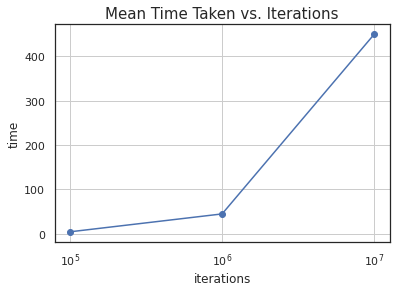

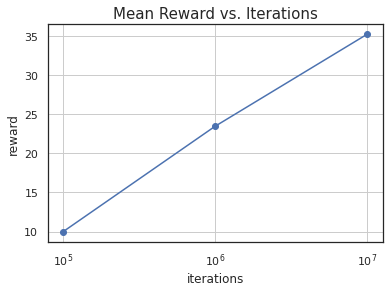

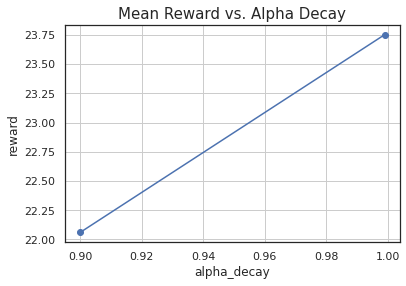

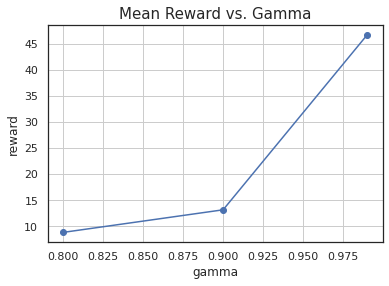

In [ ]:
# Plot time vs. Iterations
plot_QL('iterations', 'time', title='Mean Time Taken vs. Iterations', logscale=True)

plot_QL('iterations', 'reward', title='Mean Reward vs. Iterations', logscale=True)

# Plot alpha decay vs success pct
plot_QL('alpha_decay', 'reward', title='Mean Reward vs. Alpha Decay')

# Plot results vs. gamma
plot_QL('gamma', 'reward', title='Mean Reward vs. Gamma')

## Results

Best Result:
	Reward = 79.76
	Gamma = 0.99,
	Alpha = 0.10,
	Alpha Decay: 0.999,
	Epsilon Decay: 0.900,
	Iterations: 1.0E+07


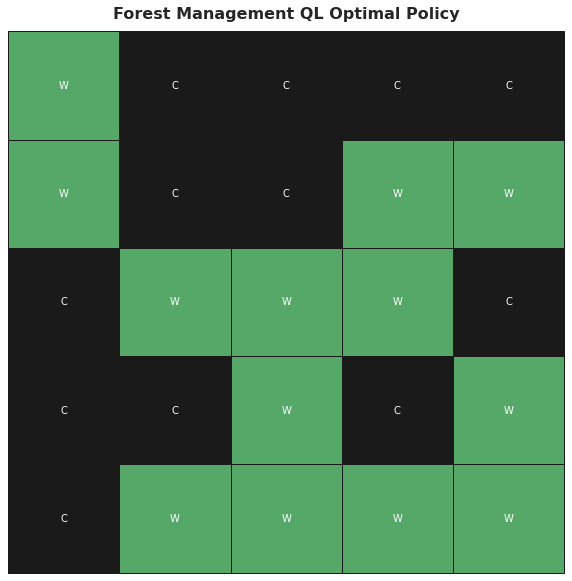

In [ ]:
# Plot most successful gamma

# find the score with the highest success percentage and get its policy
bestRun = ql_data['reward'].argmax()

best_policy = ql_data['policy'][bestRun]

# reshape the policy since we pulled from a csv file
best_policy = best_policy[1:-1]
best_policy = eval(best_policy)
best_policy = np.array(best_policy)
best_policy = best_policy.reshape(5, 5)

# plot the policy
title='Forest Management QL Optimal Policy'
plot_forest(best_policy, title)

print('Best Result:\n\tReward = %.2f\n\tGamma = %.2f,\n\tAlpha = %.2f,\n\tAlpha Decay: %.3f,\n\tEpsilon Decay: %.3f,\n\tIterations: %.1E' 
      % (ql_data['reward'].max(), ql_data['gamma'][bestRun], ql_data['alpha'][bestRun], ql_data['alpha_decay'][bestRun], ql_data['epsilon_decay'][bestRun], ql_data['iterations'][bestRun]))